# Data Exploration

### Visualization of relationships between variables 

To Do list:
- add streamlit and plotly to the flex_desal environment
- Have drop down for dates and variables to create a plot and display the average value of the vars over the time period


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### Calculating an average value from a day

In [119]:
month = 'march'
pressure_data  = pd.read_csv("WRD_pressure_data_"+month+"_2021.csv")
flow_data = pd.read_csv("WRD_flow_data_"+month+"_2021.csv")
power_data = pd.read_csv("WRD_power_data_"+month+"_2021.csv")
Data_intermed = pd.merge(flow_data,power_data,on='Date Time')
Data = pd.merge(Data_intermed,pressure_data,on='Date Time')

Data['Date Time']  = pd.to_datetime(Data['Date Time'] )

print('-'*30)
print("Valid X and Y data value Choices")
print('-'*30)
for col in Data.columns:
    print(col)
print('-'*30)

------------------------------
Valid X and Y data value Choices
------------------------------
Date Time
whole_plant-->
RO_Feed_gpm
Antiscalant_gpm
UV1_MGD
UV2_MGD
Product_water_MGD
Brine_gpm
TRO_bypass_gpm
Total_RO_permeate_gpm
RO_Flush_MGD
Concentrate_gpm
train 1 only-->
permeate_train1_s1_gpm
permeate_train1_s2_gpm
PRO_conc_train1_gpm
TRO_permeate_train1_gpm
TRO_conc_train1_gpm
Con_recycle_gpm
train 2 only --> 
permeate_train2_s1_gpm
permeate_train2_s2_gpm
PRO_conc_train1_gpm.1
TRO_permeate_train2_gpm
TRO_conc_train2_gpm
Con_recycle_train2_gpm
train3 only -->
permeate_train3_s1_gpm
permeate_train3_s2_gpm
PRO_conc_train3_gpm
TRO_permeate_train3_gpm
TRO_conc_train3_gpm
Con_recycle_train3_gpm
Unnamed: 33
train4 only -->
permeate_train4_s1_gpm
permeate_train4_s2_gpm
PRO_conc_train4_gpm
TRO_permeate_train4_gpm
TRO_conc_train4_gpm
Con_recycle_train4_gpm
PRO_feed_pump_train1_kW
PRO_feed_pump_train2_kW
PRO_feed_pump_train3_kW
PRO_feed_pump_train4_kW
PRO_IS_pump_train1_kW
PRO_IS_pump_train2_

In [120]:
#User Input
day ='2021-03-13'
variables = ["PRO_feed_pump_eff_train_1","PRO_IS_pump_eff_train_1","PRO_feed_pump_train1_kW","PRO_IS_pump_train1_kW"]

# Find values
date_stamp = datetime.strptime(day, "%Y-%m-%d")
day_df = Data[Data['Date Time'].between(date_stamp, date_stamp + timedelta(days=1))]
# day_df.loc[:,Data.columns[1:]] = pd.to_numeric(day_df.loc[:,Data.columns[1:]])
day_df[day_df.columns[1:]] = day_df[day_df.columns[1:]].apply(pd.to_numeric)
# Add any calcualted variables
day_df["PRO_feed_flow_train_1_m3/s"] = (day_df["permeate_train1_s1_gpm"] + day_df["permeate_train1_s2_gpm"] + day_df["PRO_conc_train1_gpm"]) / 60 /264.2 
day_df["PRO_feed_flow_train_1_gpm"] = (day_df["permeate_train1_s1_gpm"] + day_df["permeate_train1_s2_gpm"] + day_df["PRO_conc_train1_gpm"])

day_df["PRO_stage_1_conc_flow_train_1_gpm"] = day_df["PRO_feed_flow_train_1_gpm"] - day_df["permeate_train1_s1_gpm"]
day_df["PRO_stage_1_conc_flow_train_1_m3/s"] = (day_df["PRO_feed_flow_train_1_gpm"] - day_df["permeate_train1_s1_gpm"]) / 60 / 264.2

day_df["PRO_feed_pump_eff_train_1"] = day_df["PRO_feed_flow_train_1_m3/s"] * (day_df["PRO_feed_pressure_train_1_psi"] - day_df["RO_feed_pressure_psi"]) / 14.5 *10**5 / (day_df["PRO_feed_pump_train1_kW"] *1000)
day_df["PRO_IS_pump_eff_train_1"] = day_df["PRO_stage_1_conc_flow_train_1_m3/s"] * (day_df["PRO_IS_pump_discharge_pressure_train_1_psi"] - day_df["PRO_IS_pump_suction_pressure_train_1_psi"]) / 14.5 *10**5 / (day_df["PRO_IS_pump_train1_kW"] *1000)


day_df["TRO_feed_train1_gpm"] = day_df["TRO_permeate_train1_gpm"] + day_df["TRO_conc_train1_gpm"]

for name in variables:
    print("\nAverage value of "+name+" on "+ day)
    print((day_df.loc[:,name].mean()))
print('-'*30)


Average value of PRO_feed_pump_eff_train_1 on 2021-03-13
0.6264739169265652

Average value of PRO_IS_pump_eff_train_1 on 2021-03-13
0.579699484973615

Average value of PRO_feed_pump_train1_kW on 2021-03-13
201.86751687356005

Average value of PRO_IS_pump_train1_kW on 2021-03-13
22.85334997965996
------------------------------


C:\Users\rchurchi\AppData\Local\Temp\1\ipykernel_13560\704203858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df[day_df.columns[1:]] = day_df[day_df.columns[1:]].apply(pd.to_numeric)
C:\Users\rchurchi\AppData\Local\Temp\1\ipykernel_13560\704203858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df["PRO_feed_flow_train_1_m3/s"] = (day_df["permeate_train1_s1_gpm"] + day_df["permeate_train1_s2_gpm"] + day_df["PRO_conc_train1_gpm"]) / 60 /264.2
C:\Users\rchurchi\AppData\Local\Temp\1\ipykerne

# Plotting

In [125]:
# User input to define x and y data
plot_title = "PRO Feed Pump Efficiency vs. Feed Flowrate"
x_data_name = "PRO_stage_1_conc_flow_train_1_m3/s"
y_data_name_list = ["PRO_IS_pump_train1_kW","Expected_Pump_Load"]

# No derived quantities
eta_elec = .85
other_loads = 3
flow = day_df["PRO_stage_1_conc_flow_train_1_m3/s"]
day_df["Pump_curve_eta"] = -234.386*flow**3 - 133.157*flow**2 + 21.112*flow + 0.067
day_df["Expected_Pump_Load"] = ((day_df["PRO_stage_1_conc_flow_train_1_m3/s"] 
                                    * (day_df["PRO_IS_pump_discharge_pressure_train_1_psi"]-day_df["PRO_IS_pump_suction_pressure_train_1_psi"]) / 14.5 *10**5) 
                                    / day_df["Pump_curve_eta"] / eta_elec / 1000
                                    + other_loads)


C:\Users\rchurchi\AppData\Local\Temp\1\ipykernel_13560\278108715.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df["Pump_curve_eta"] = -234.386*flow**3 - 133.157*flow**2 + 21.112*flow + 0.067
C:\Users\rchurchi\AppData\Local\Temp\1\ipykernel_13560\278108715.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df["Expected_Pump_Load"] = ((day_df["PRO_stage_1_conc_flow_train_1_m3/s"]


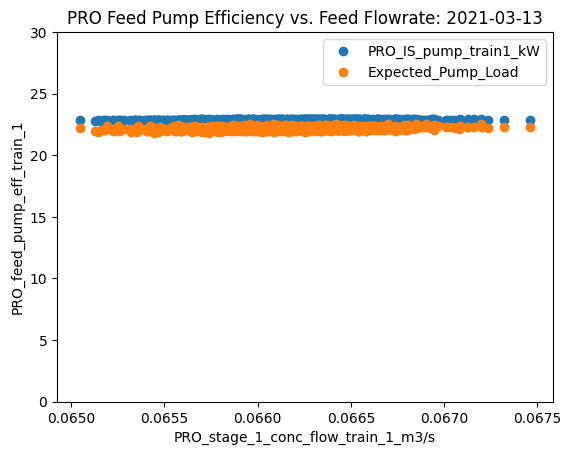

In [126]:
# Create Plot
x_data = day_df[x_data_name]
for y_data_name in y_data_name_list:
    y_data = day_df[y_data_name]
    figure = plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title + ": " + day)
plt.xlabel(x_data_name)

plt.ylabel("PRO_feed_pump_eff_train_1")
#x = np.linspace(0,10000)
#plt.plot(x,x,"-k",label="y=x")
#Adjust Axes as needed
# plt.xlim(1400,2700)
plt.ylim(0,30)
plt.legend(loc='best')
#Export Figure
plt.savefig(plot_title+".png")
